## 2.3 시계열 데이터를 예측하는 회귀 ANN 구현
보스턴 집값을 예측하는 사례로 회귀 ANN 구현 사례를 다룹니다.

### 2.3.1 회귀 ANN 모델링
1. 회귀 ANN 모델을 구현합니다. 
- 모델 구현을 위해 케라스 패키지에 들어 있는 서브패키지 layers와 models를 불러옵니다. 

In [5]:
from keras import layers, models

- 클래스를 만들고 클래스 생성자 함수에 사용될 신경망 계층을 정의합니다. 

In [6]:
class ANN(models.Model):
    def __init__(self, Nin, Nh, Nout):
        # Prepare network layers and activate functions
        hidden = layers.Dense(Nh)
        output = layers.Dense(Nout)
        relu = layers.Activation('relu')

        # Connect network elements
        x = layers.Input(shape=(Nin,))
        h = relu(hidden(x))
        y = output(h)

        super().__init__(x, y)
        self.compile(loss='mse', optimizer='sgd')

### 2.3.2 학습과 평가용 데이터 불러오기
2. 학습과 평가에 사용할 Boston housing 데이터 셋을 불러오고 정규화를 진행합니다. 

In [7]:
from keras import datasets
from sklearn import preprocessing

def Data_func():
    (X_train, y_train), (X_test, y_test) = datasets.boston_housing.load_data()
    scaler = preprocessing.MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    return (X_train, y_train), (X_test, y_test)

### 2.3.3 회귀 ANN 학습 결과 그래프 구현
3. 회귀 ANN의 학습 결과를 표시하는 그래프

In [8]:
from keraspp.skeras import plot_loss
import matplotlib.pyplot as plt

### 2.3.4 회귀 ANN 학습 및 성능 분석
4. 회귀 ANN에 대한 학습과 성능을 분석을 진행하는 명령을 내립니다. 

Epoch 1/100
4/4 - 0s - loss: 478.3341 - val_loss: 106.3890
Epoch 2/100
4/4 - 0s - loss: 96.1139 - val_loss: 88.2056
Epoch 3/100
4/4 - 0s - loss: 77.3092 - val_loss: 127.1817
Epoch 4/100
4/4 - 0s - loss: 80.6153 - val_loss: 58.0730
Epoch 5/100
4/4 - 0s - loss: 52.8222 - val_loss: 58.5521
Epoch 6/100
4/4 - 0s - loss: 52.4533 - val_loss: 51.9659
Epoch 7/100
4/4 - 0s - loss: 46.3898 - val_loss: 46.3008
Epoch 8/100
4/4 - 0s - loss: 44.0762 - val_loss: 60.0542
Epoch 9/100
4/4 - 0s - loss: 46.6453 - val_loss: 64.2309
Epoch 10/100
4/4 - 0s - loss: 54.2866 - val_loss: 46.7775
Epoch 11/100
4/4 - 0s - loss: 45.2620 - val_loss: 38.8658
Epoch 12/100
4/4 - 0s - loss: 43.7960 - val_loss: 60.6970
Epoch 13/100
4/4 - 0s - loss: 80.2178 - val_loss: 53.1720
Epoch 14/100
4/4 - 0s - loss: 57.6628 - val_loss: 39.2651
Epoch 15/100
4/4 - 0s - loss: 36.9601 - val_loss: 39.3463
Epoch 16/100
4/4 - 0s - loss: 52.3025 - val_loss: 91.1897
Epoch 17/100
4/4 - 0s - loss: 95.2121 - val_loss: 33.1031
Epoch 18/100
4/4 - 0

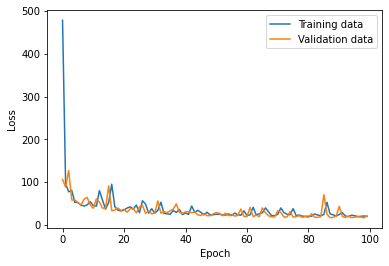

In [9]:
Nin = 13
Nh = 5
Nout = 1

model = ANN(Nin, Nh, Nout)
(X_train, y_train), (X_test, y_test) = Data_func()
history = model.fit(X_train, y_train, epochs=100, 
                    batch_size=100, validation_split=0.2, verbose=2)

performace_test = model.evaluate(X_test, y_test, batch_size=100)
print('\nTest Loss -> {:.2f}'.format(performace_test))

plot_loss(history)
plt.show()

---
### 2.3.5 전체코드

Epoch 1/100
4/4 - 0s - loss: 446.5541 - val_loss: 128.0201
Epoch 2/100
4/4 - 0s - loss: 108.9136 - val_loss: 112.4833
Epoch 3/100
4/4 - 0s - loss: 88.8319 - val_loss: 136.5690
Epoch 4/100
4/4 - 0s - loss: 76.6614 - val_loss: 68.0886
Epoch 5/100
4/4 - 0s - loss: 61.7409 - val_loss: 82.5634
Epoch 6/100
4/4 - 0s - loss: 72.0130 - val_loss: 97.3553
Epoch 7/100
4/4 - 0s - loss: 55.9550 - val_loss: 54.9127
Epoch 8/100
4/4 - 0s - loss: 49.9966 - val_loss: 56.6309
Epoch 9/100
4/4 - 0s - loss: 51.6878 - val_loss: 56.1759
Epoch 10/100
4/4 - 0s - loss: 65.9424 - val_loss: 46.8505
Epoch 11/100
4/4 - 0s - loss: 43.2241 - val_loss: 48.1130
Epoch 12/100
4/4 - 0s - loss: 41.0303 - val_loss: 56.6143
Epoch 13/100
4/4 - 0s - loss: 68.8754 - val_loss: 40.9030
Epoch 14/100
4/4 - 0s - loss: 38.7080 - val_loss: 45.9900
Epoch 15/100
4/4 - 0s - loss: 47.9596 - val_loss: 57.0690
Epoch 16/100
4/4 - 0s - loss: 43.1500 - val_loss: 48.8059
Epoch 17/100
4/4 - 0s - loss: 52.3103 - val_loss: 56.6444
Epoch 18/100
4/4 -

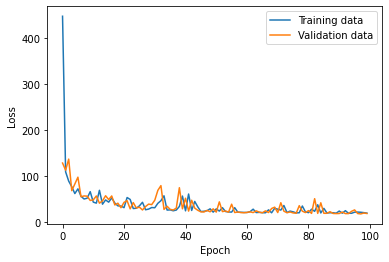

In [10]:
# file: ex2_2_ann_rg.py

# 1. 회귀 ANN 모델링 
from keras import layers, models

class ANN(models.Model):
    def __init__(self, Nin, Nh, Nout):
        # Prepare network layers and activate functions
        hidden = layers.Dense(Nh)
        output = layers.Dense(Nout)
        relu = layers.Activation('relu')

        # Connect network elements
        x = layers.Input(shape=(Nin,))
        h = relu(hidden(x))
        y = output(h)

        super().__init__(x, y)
        self.compile(loss='mse', optimizer='sgd')

# 2. 학습과 평가용 데이터 불러오기
from keras import datasets
from sklearn import preprocessing

def Data_func():
    (X_train, y_train), (X_test, y_test) = datasets.boston_housing.load_data()
    scaler = preprocessing.MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    return (X_train, y_train), (X_test, y_test)


# 3. 회귀 ANN 학습 결과 그래프 구현
import matplotlib.pyplot as plt
from keraspp.skeras import plot_loss

# 4. 회귀 ANN 학습 및 성능 분석
def main():
    Nin = 13
    Nh = 5
    Nout = 1

    model = ANN(Nin, Nh, Nout)
    (X_train, y_train), (X_test, y_test) = Data_func()

    history = model.fit(X_train, y_train, epochs=100, batch_size=100, validation_split=0.2, verbose=2)

    performace_test = model.evaluate(X_test, y_test, batch_size=100)
    print('\nTest Loss -> {:.2f}'.format(performace_test))

    plot_loss(history)
    plt.show()

main()